## Neural Network From Scratch
### Wyatt Cupp
### <wyattcupp@gmail.com>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


%matplotlib inline

### Plotting Utils

In [2]:
def plot_cost(cost_iterator, name=None): #TODO: enhance
    plt.plot(range(len(cost_iter)), cost_iter, label='y')
    plt.xlabel('$x$', fontsize=15)
    plt.ylabel('$cost$', fontsize=15)
    
    if name is not None:
        title = name + ': iteration (x) vs cost(y)'
    else:
        title = 'iteration(x) vs cost (y)'
        
    plt.title(title)
    plt.grid()
    plt.legend(loc=2)
    plt.show()

### Using the MLP for XOR

In [4]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
Y = np.array([ [0],
               [1],
               [1],
               [0]])

X.shape, Y.shape

((4, 2), (4, 1))

In [20]:
from mlp import *
from activations import *

model = MultiLayerPerceptron([DenseLayer(2, activation=Sigmoid(), input_shape=2), # 1 hidden layer w/ 2 neurons
                             DenseLayer(1, activation=Sigmoid())],loss=MSE(), verbose=True) # 1 output layer w/ 1 neuron  

cost_iter = model.train(X, Y,lr=1,epochs=3000)

print('\nAccuracy: {}'.format(accuracy_score(model.predict(X), Y)))

Beginning training ...
Layer 0 weights shape: (2, 2)
Layer 1 weights shape: (2, 1)
Learning Rate: 1, epochs: 3000
---------------------------------------

Cost after epoch #0: 0.5207547896884711
Cost after epoch #100: 0.5000902294559726
Cost after epoch #200: 0.5000160330127704
Cost after epoch #300: 0.49997499073883445
Cost after epoch #400: 0.4999337605921767
Cost after epoch #500: 0.4998734408496406
Cost after epoch #600: 0.4997596937143326
Cost after epoch #700: 0.4994817297311276
Cost after epoch #800: 0.4984929589035167
Cost after epoch #900: 0.4920045065730211
Cost after epoch #1000: 0.43943707853413816
Cost after epoch #1100: 0.3571645564686308
Cost after epoch #1200: 0.10035225742554074
Cost after epoch #1300: 0.029824238945099835
Cost after epoch #1400: 0.015941329719252387
Cost after epoch #1500: 0.010593879392118985
Cost after epoch #1600: 0.007841172560145316
Cost after epoch #1700: 0.0061850669997840875
Cost after epoch #1800: 0.005087095261717731
Cost after epoch #1900: 

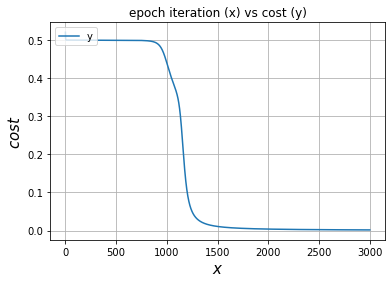

In [22]:
plot_cost(cost_iter)

In [9]:
from mlp import *
from activations import *

#TODO: why does the cost stop dropping??????
model = MultiLayerPerceptron([DenseLayer(2, activation=TanH(), input_shape=2), # 1 hidden layer w/ 2 neurons
                             DenseLayer(1, activation=Sigmoid())],loss=MSE(), verbose=True) # 1 output layer w/ 1 neuron  

cost_iter = model.train(X, Y,lr=0.2,epochs=1000)

print('\nAccuracy: {}'.format(accuracy_score(model.predict(X), Y))) #TODO: WHY IS THIS NOT LEARNING CONSISTENTLY?

Beginning training ...
Layer 0 weights shape: (2, 2)
Layer 1 weights shape: (2, 1)
Learning Rate: 0.2, epochs: 1000
---------------------------------------

Cost after epoch #0: 0.5027070286564663
Cost after epoch #100: 0.4705351070670369
Cost after epoch #200: 0.4104992490593348
Cost after epoch #300: 0.330625117879368
Cost after epoch #400: 0.3258895272351561
Cost after epoch #500: 0.3303942325231559
Cost after epoch #600: 0.3335914383285099
Cost after epoch #700: 0.33324903284217405
Cost after epoch #800: 0.33368356344846994
Cost after epoch #900: 0.3338271072379877

Accuracy: 0.75


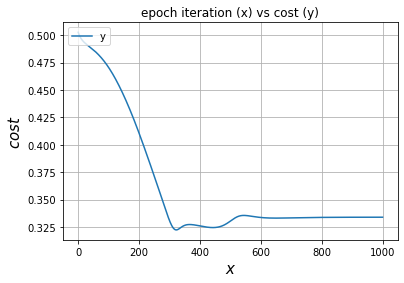

In [10]:
plot_cost(cost_iter)

### Try on the Iris Dataset

In [23]:
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

data = datasets.load_iris()
print(len(data.data))
X = data.data[:300]
y = data.target[:300]
encoder.fit(y.reshape(-1,1))
y_new = encoder.transform(y.reshape(-1,1)).toarray()

X.shape, y_new.shape

150


((150, 4), (150, 3))

Check accuracy with our trained model on the iris dataset: 

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

data = datasets.load_iris()
X = data.data
y = data.target
encoder.fit(y.reshape(-1,1))

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=0)

# transform y_train into correct shape for categorical data labels
y_train = encoder.transform(y_train.reshape(-1,1)).toarray()

X_train.shape, y_train.shape

((120, 4), (120, 3))

In [40]:
from mlp import *
from activations import *
#TODO: why does the cost stop dropping????
model = MultiLayerPerceptron([DenseLayer(10, activation=Relu(), input_shape=4), # hidden 1
                             DenseLayer(10, activation=Relu()), # hidden 2
                             DenseLayer(3, activation=SoftMax())],loss=CrossEntropy(), verbose=True) # 1 output layer w/ 3 neuron  

cost_iter = model.train(X_train, y_train,lr=0.001,epochs=5000)

Beginning training ...
Layer 0 weights shape: (4, 10)
Layer 1 weights shape: (10, 10)
Layer 2 weights shape: (10, 3)
Learning Rate: 0.001, epochs: 5000
---------------------------------------

Cost after epoch #0: 0.6584626614858532
Cost after epoch #100: 0.20859069674319505
Cost after epoch #200: 0.19715628371147753
Cost after epoch #300: 0.6719489288996289
Cost after epoch #400: 1.1743310136477105
Cost after epoch #500: 0.06708192868574599
Cost after epoch #600: 0.05379139101690868
Cost after epoch #700: 0.051733654127225824
Cost after epoch #800: 0.06034089775217206
Cost after epoch #900: 0.05690483716718734
Cost after epoch #1000: 0.054208401838012135
Cost after epoch #1100: 0.046300177001612715
Cost after epoch #1200: 0.04713831057762346
Cost after epoch #1300: 0.053551617589801044
Cost after epoch #1400: 0.04612252683445887
Cost after epoch #1500: 0.04891525997502595
Cost after epoch #1600: 0.04815200547981905
Cost after epoch #1700: 0.04582914137299445
Cost after epoch #1800: 0.

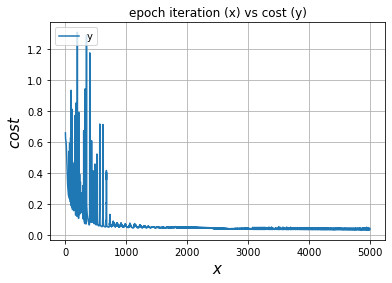

In [41]:
plot_cost(cost_iter)

In [42]:
model.accuracy(X_test,y_test)

1.0

In [46]:
preds = model.predict(X_test)
print(preds[:5], y_test[:5])

[2 1 0 2 0] [2 1 0 2 0]


In [55]:
from mlp import *
from activations import *
#TODO: why does the cost stop dropping????
model = MultiLayerPerceptron([DenseLayer(10, activation=Relu(), input_shape=4), # hidden 1
                             DenseLayer(10, activation=Relu()), # hidden 2
                             DenseLayer(3, activation=SoftMax())],loss=CrossEntropy(), verbose=True) # 1 output layer w/ 3 neuron  

cost_iter = model.train(X_train, y_train,lr=0.001,epochs=5000)

Beginning training ...
Layer 0 weights shape: (4, 10)
Layer 1 weights shape: (10, 10)
Layer 2 weights shape: (10, 3)
Learning Rate: 0.001, epochs: 5000
---------------------------------------

Cost after epoch #0: 0.6445801158126833
Cost after epoch #100: 0.26523522049955905
Cost after epoch #200: 0.26893174336777437
Cost after epoch #300: 0.23492216998439533
Cost after epoch #400: 0.18250034532363474
Cost after epoch #500: 0.25425878503910765
Cost after epoch #600: 0.06394926395562002
Cost after epoch #700: 0.05162471746393504
Cost after epoch #800: 0.05366492551476025
Cost after epoch #900: 0.0670986575621235
Cost after epoch #1000: 0.05210595147219081
Cost after epoch #1100: 0.045889207556042956
Cost after epoch #1200: 0.05662458944066211
Cost after epoch #1300: 0.04879301670429839
Cost after epoch #1400: 0.04226455136071132
Cost after epoch #1500: 0.05757288823510258
Cost after epoch #1600: 0.04101001561409862
Cost after epoch #1700: 0.07603457290342817
Cost after epoch #1800: 0.05

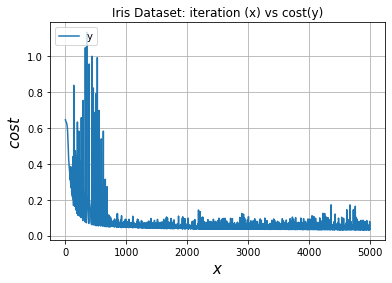

In [56]:
plot_cost(cost_iter, name='Iris Dataset')

In [57]:
model.accuracy(X_test,y_test)

1.0

### Digits Dataset

In [7]:
data = datasets.load_digits()

X = data.data
y = data.target

print(X.shape, y.shape)

encoder = OneHotEncoder()

encoder.fit(y.reshape(-1,1))

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=0)

# transform y_train into correct shape for categorical data labels
y_train = encoder.transform(y_train.reshape(-1,1)).toarray()

X_train.shape, y_train.shape

(1797, 64) (1797,)


((1437, 64), (1437, 10))

In [14]:
# Build the model object
from mlp import *
model = MultiLayerPerceptron([DenseLayer(512, activation=LeakyRelu(), input_shape=X_train.shape[1]), # hidden 1
                             DenseLayer(512, activation=LeakyRelu()), # hidden 2
                             DenseLayer(512, activation=LeakyRelu()),
                             DenseLayer(512, activation=LeakyRelu()),
                             DenseLayer(10, activation=SoftMax())],loss=CrossEntropy(), verbose=True) # 1 output layer w/ 3 neuron  

cost_iter = model.train(X_train, y_train,lr=0.1,epochs=2000)

Beginning training ...
Layer 0 weights shape: (64, 512)
Layer 1 weights shape: (512, 512)
Layer 2 weights shape: (512, 512)
Layer 3 weights shape: (512, 512)
Layer 4 weights shape: (512, 10)
Learning Rate: 0.1, epochs: 2000
---------------------------------------

Cost after epoch #0: 0.32763303591233894
Cost after epoch #100: 4.9339755439085105
Cost after epoch #200: 4.9339755439085105
Cost after epoch #300: 4.9339755439085105
Cost after epoch #400: 4.9339755439085105
Cost after epoch #500: 4.9339755439085105
Cost after epoch #600: 4.9339755439085105
Cost after epoch #700: 4.9339755439085105
Cost after epoch #800: 4.9339755439085105
Cost after epoch #900: 4.9339755439085105
Cost after epoch #1000: 4.9339755439085105
Cost after epoch #1100: 4.9339755439085105
Cost after epoch #1200: 4.9339755439085105
Cost after epoch #1300: 4.9339755439085105
Cost after epoch #1400: 4.9339755439085105
Cost after epoch #1500: 4.9339755439085105
Cost after epoch #1600: 4.9339755439085105
Cost after epoc

### Implementing Gradient Descent with Linear Regression (sanity check)

In [48]:
def f(x): return x * 2

X = np.random.uniform(0, 1, 50)
noise_variance = 0.2  # Variance of the gaussian noise
noise = np.random.randn(X.shape[0]) * noise_variance
y = f(X) + noise

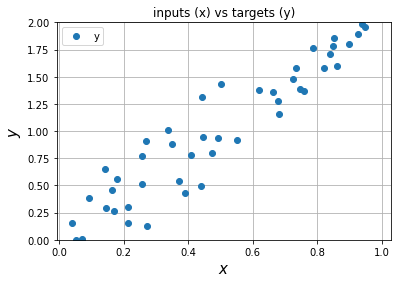

((50,), (50,))

In [49]:
plt.plot(X, y, 'o', label='y')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.show()
X.shape,y.shape

In [50]:
m = 0
b = 0
lr = 0.01
epochs = 5000
n = len(X)
 
def mse_cost(y,y_hat):
    assert(len(y)==len(y_hat))
    return np.sum((y-y_hat)**2)/float(len(y))

cost_iter = []
# Perform Gradient Descent
for i in range(epochs):
    y_hat = m*X + b  # The current predicted value of Y
    
    cost = mse_cost(y,y_hat)
    cost_iter.append(cost)
    if i % 100 == 0:
        print('Current cost: {}'.format(cost))
    
    Dm = (-2/n) * np.sum(X * (y - y_hat))  # Derivative wrt m
    Dc = (-2/n) * np.sum(y - y_hat)  # Derivative wrt c
    m = m - lr * Dm  # Update m
    b = b - lr * Dc  # Update c
       
print (m, b)

Current cost: 1.5946077061245496
Current cost: 0.23268340399843235
Current cost: 0.1813150652533628
Current cost: 0.14776332524917446
Current cost: 0.12240010540113128
Current cost: 0.10320522126624318
Current cost: 0.08867841521220646
Current cost: 0.07768443864083442
Current cost: 0.06936412924501559
Current cost: 0.06306726768696694
Current cost: 0.05830176395447873
Current cost: 0.05469520128591711
Current cost: 0.051965732375088856
Current cost: 0.049900053439264624
Current cost: 0.04833673485777066
Current cost: 0.047153605696283046
Current cost: 0.04625820623686852
Current cost: 0.045580562393729915
Current cost: 0.04506771734639882
Current cost: 0.044679593045949414
Current cost: 0.04438585817733109
Current cost: 0.04416355781391063
Current cost: 0.04399531952538428
Current cost: 0.043867995749161955
Current cost: 0.04377163632864295
Current cost: 0.04369871092383446
Current cost: 0.04364352052690351
Current cost: 0.04360175209351055
Current cost: 0.04357014148505118
Current co

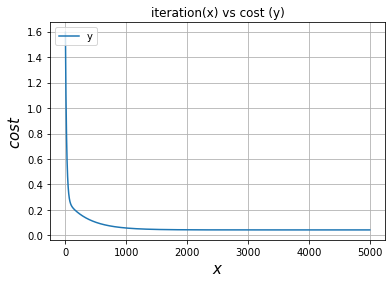

In [53]:
plot_cost(cost_iter)

### Plot Fitted Linear Regression Line

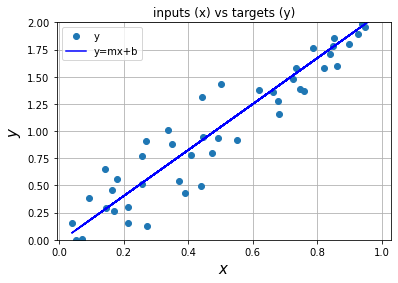

((50,), (50,))

In [54]:
plt.plot(X, y, 'o', label='y')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)

# plot new regression line w/ new weights:
y_pred = X*m+b
plt.plot(X,y_pred, label='y=mx+b', c='b')

plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.show()
X.shape,y.shape